## Ejercicio 5.27
*Kassimali, A. (2012). Matrix Analysis of Structures. 2nd Edition. Cengage Learning.*

![NON](img/ejercicio_5.27.png)

In [1]:
from PyStructMatrix import StructuralMatrixAnalysis, StructuralPlotter

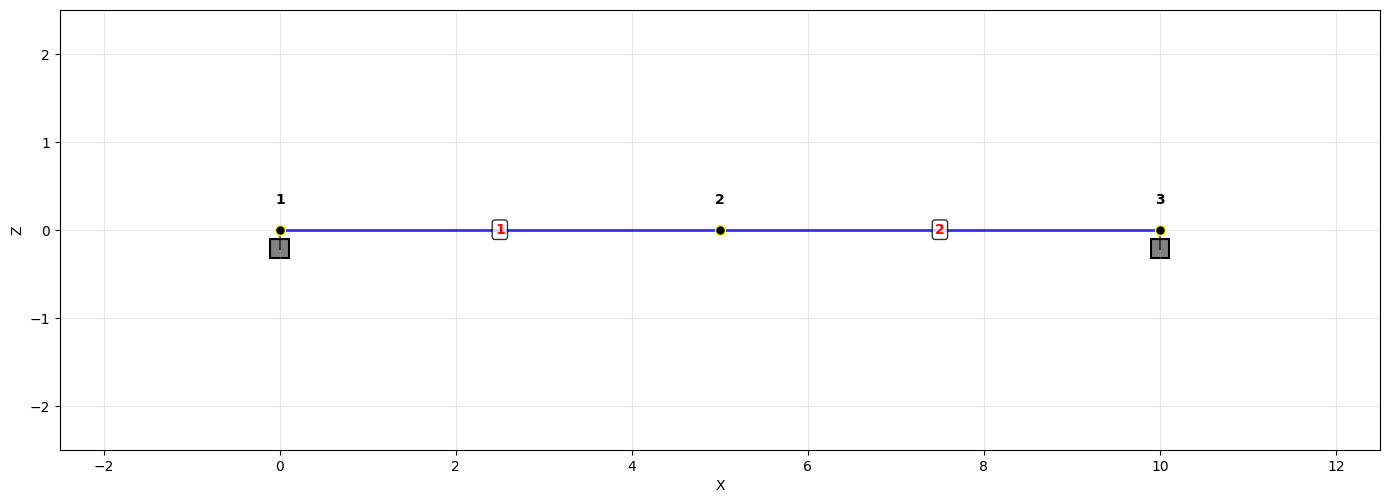

In [2]:
# Crear el sistema estructural
system = StructuralMatrixAnalysis()
plotter = StructuralPlotter(system)

# Definir propiedades del material y secciones
E = 31.5 * 10 ** 6
A = 1
I = 400 * 10**-6

# Definición de Nodos (Geometría)
system.defineNode(1, x=0, z=0)
system.defineNode(2, x=5, z=0)
system.defineNode(3, x=10, z=0)

# Asignación de Restricciones (Condiciones de Apoyo)
system.assignJoint.restrictions(1, ux=True, uz=True, ry=True) # restricción en los 3 GL
system.assignJoint.restrictions(3, ux=True, uz=True, ry=True) # restricción en los 3 GL

# Definición de Elementos (Conectividad)
system.defineElement(1, 1, 2, A=A, E=E, I=I)
system.defineElement(2, 2, 3, A=A, E=E, I=I*2)

# Asignación de Cargas
system.assignJoint.force(2, fx=0, fz=-75, my=60)

# Visualización Inicial
plotter.showFrame()

In [3]:
# Ejecución del Análisis Matricial
system.RunCompleteAnalysis(show_process=True)


--------------------------------------------------------------------------------
 1. INFORMACIÓN GENERAL
--------------------------------------------------------------------------------
Número de nodos: 3
Número de elementos: 2
Grados de libertad totales: 9
Grados de libertad restringidos (desplazamientos conocidos): 6 de 9
GL restringidos: [0 1 2 6 7 8]
Grados de libertad libres (fuerzas conocidas): 3 de 9
GL libres: [3 4 5]

--------------------------------------------------------------------------------
 2. MATRICES PARTICIONADAS
--------------------------------------------------------------------------------
KAA (3x3):
  |         3 |          4 |          5 |

  |   12600000 |          0 |          0 |
  |          0 |       3629 |       3024 |
  |          0 |       3024 |      30240 |
 
KAB (3x6):
  |         0 |          1 |          2 |          6 |          7 |          8 |
 
  |   -6300000 |          0 |          0 |   -6300000 |          0 |          0 |
  |          0 |  

In [4]:
# Obtención de Resultados Detallados de Elementos
system.getInfoElements()

ELEMENTO 1: [1, 2]  - Tipo 0
PROPIEDADES
  Longitud: 5.000
  Área (A): 1.0000e+00
  Módulo elástico (E): 3.1500e+07
  Momento de inercia (I): 4.0000e-04
  Liberaciones:  Nodo i = NO | Nodo j = NO
  Orientación: C=1.000 | S=0.000

CARGAS APLICADAS:
  No hay cargas aplicadas

MATRIZ DE TRANSFORMACIÓN T (6x6):
  |      1.000 |      0.000 |      0.000 |      0.000 |      0.000 |      0.000 |
  |     -0.000 |      1.000 |      0.000 |      0.000 |      0.000 |      0.000 |
  |      0.000 |      0.000 |      1.000 |      0.000 |      0.000 |      0.000 |
  |      0.000 |      0.000 |      0.000 |      1.000 |      0.000 |      0.000 |
  |      0.000 |      0.000 |      0.000 |     -0.000 |      1.000 |      0.000 |
  |      0.000 |      0.000 |      0.000 |      0.000 |      0.000 |      1.000 |

MATRIZ DE RIGIDEZ LOCAL K (6x6):
  | 6300000.000 |      0.000 |      0.000 | -6300000.000 |      0.000 |      0.000 |
  |      0.000 |   1209.600 |   3024.000 |      0.000 |  -1209.600 |   3024.000 

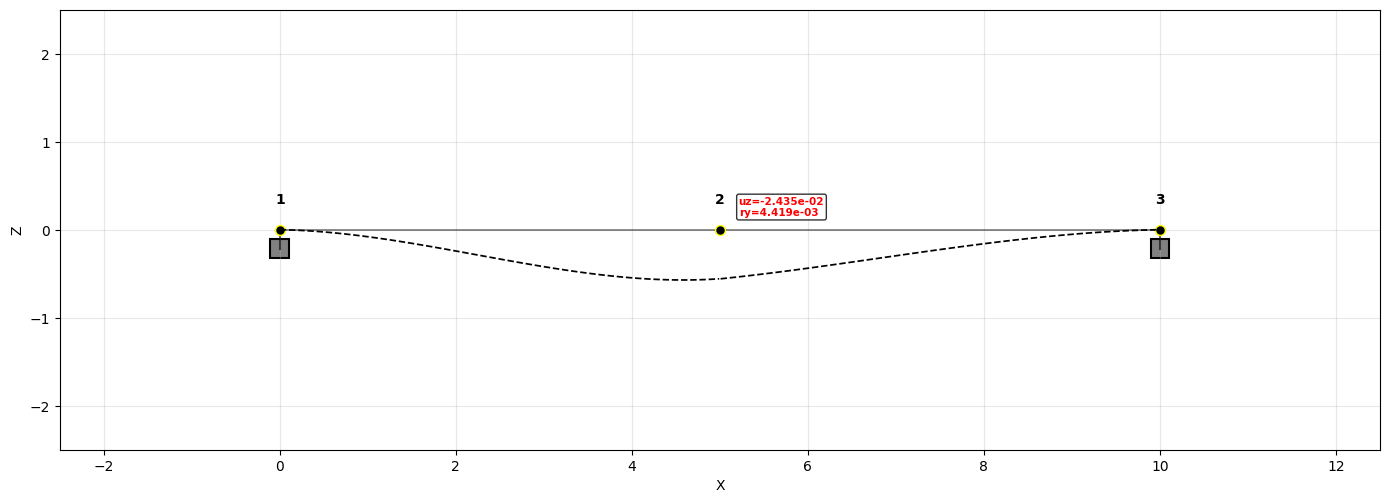

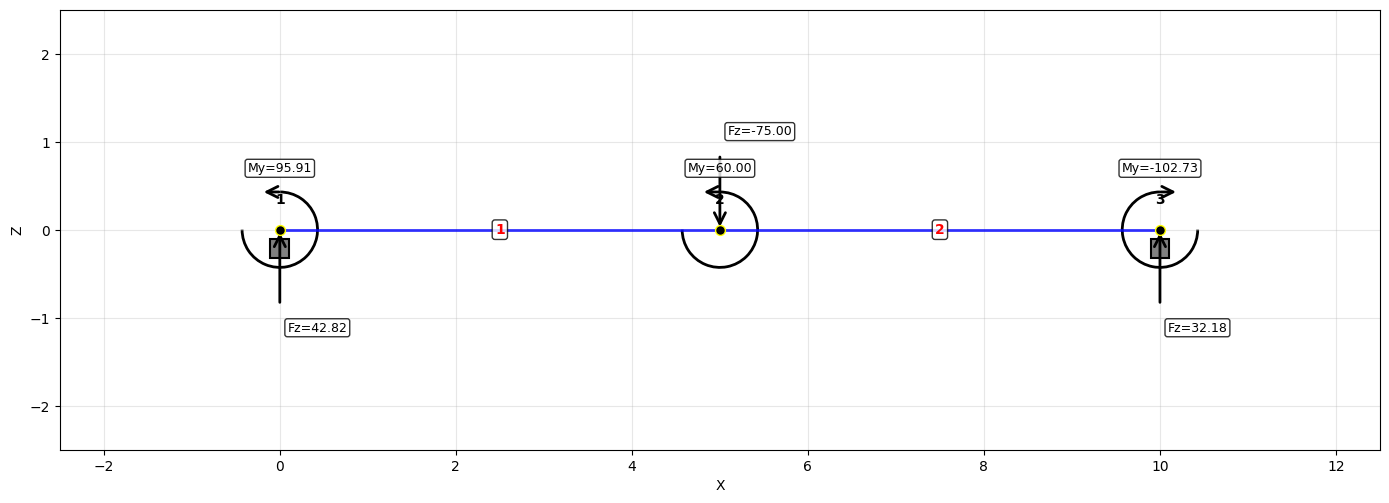

In [5]:
# Visualización de Resultados
plotter.showDeformedShape(escala=0.1)
plotter.showReactions()